# The Data Science Process Using PyTorch

<blockquote>Data science ins an interdisiplinary study of data whose central focus is the data life cycle and how data is applied to the decision making process.</blockquote>

- The data science pipeline consists of the following steps:
    1. Data Source: raw data, for example, from instruments
        - ETL Pipeline: extract, transform and load
        - Update operations using code
    2. Data Storage: organization and accessibility
        - querying for specific data needed for analytics using code
    3. Data Analytics: statistics, machine learning, and artificial intelligence
        - produces information that can be used for decision making using statistics and AI
    4. The Decision: expert or bots
    5. Model Deployment: here the model is directly connected with the data source
        - Implemented in an integrated software
        
## The Process of Model Building

0. Identify a problem the data science aims to solve
1. Prepare the data (ETL, extract, transform, load)
    - Fractal process, applied on various scales (single program -> large scale enterprise level)
2. Build the model
3. Train the model
4. Analyse model results


## Preparation of Data

### The ETL Process

1. Extract - Get the data from the source 
2. Transform - Put the data into a tensor form
    - Here other transformations might be required as the data might not be available in the desired (eg. structured) format
3. Load - Put the data into an object to make it easily accessible
    - PyTorch provides us with the following abstract classes in order to achieve this task
        - DataSet
        - DataLoader -> wraps the dataset and provides access to the dataset
    - Access to data and quering capabilities

<blockquote>An abstract class is a Python class that has methods we must implement, so we can create a custom dataset by creating a subclass that extends the fucntionality of the Dataset class.</blockquote>

In [69]:
import torch
import torchvision
import torchvision.transforms as transforms 
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import Dataset

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# print format
torch.set_printoptions(linewidth=120) 

In [20]:
# custom dataset class that extends Dataset and implements required methods
class OHLC(Dataset):
    def __init__(self, csv_file):
        self.data = pd.read_csv(csc_file)
        
    def __get__item(self,index):
        r = self.data.iloc[index]
        label = torch.tensor(r.is_up_day, dtype=torch.long)
        sample = self.normalize(torch.tensor([r.open, r.high, r.low, r.close]))
        return sample, label
    
    def __len__(self):
        return len(self.data)

In [22]:
# Download fashionMNIST dataset
# train set variable
train_set = torchvision.datasets.FashionMNIST(
    root='./Documents/data'
     ,train=True
    ,download=True # downloads it locally (checks existence beforehand)
    ,transform=transforms.Compose([
        transforms.ToTensor() # butilt in tensor transformer
    ])
)

# data loader variable with batch size = 10
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=40 # default size of batch size is 1
)

print('Balanced Dataset. \nDistribution ->',train_set.train_labels.bincount())

Balanced Dataset. 
Distribution -> tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])


/Users/natitaw/opt/anaconda3/lib/python3.7/site-packages/torchvision/datasets/mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


### Using the Data Loader to Show Data

Labels:  tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8, 4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5,
        2, 1, 6])


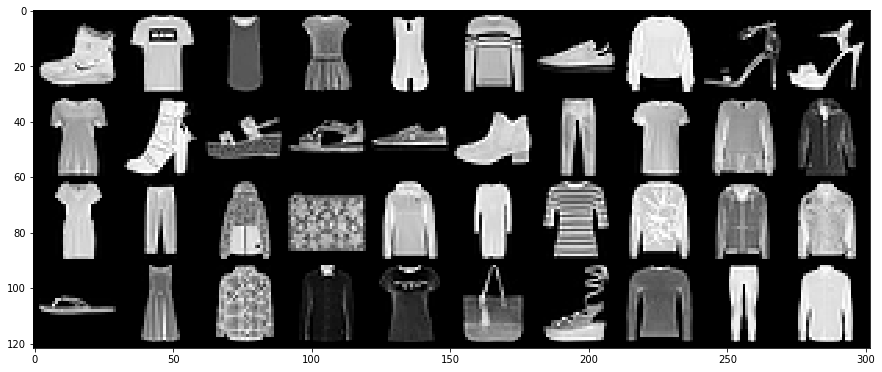

In [23]:
batch = next(iter(train_loader))

images, labels = batch
grid = torchvision.utils.make_grid(images,nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

print('Labels: ', labels)


### Object Oriented Neural Networks

- PyTorch models are created with OOP
- With OOP we orient our program design and structure around objects

<blockquote>Objects are defined in code using classes. A class defines the object's specification or spec, which specifies what data and code each object of the class should have.</blockquote>

- Classes encapsulate code and data
- All instances of a given class have two core components defined by the class
    1. Methods: represent the code (behavior of the object)
    2. Attributes: represent the data
- The torch.nn package is used to build neural networks in PyTorch
    - This library contains all the components needed to build a neural network
    - The base class here is Module which is extended by all other NN classes
    - Keeps track of weights and biases within each layer
    - We can extend this class to have specific actions such as, for example, printing the class in a certain way
    - the **super()** keyword allows us to access the methods of the parent class

<blockquote>When we pass a tensor to our network as input, the tensor flows forward through each layer transformation until the tensor reaches the output layer. This process of a tensor flowing forward through the network is known as a forward pass.</blockquote>

<blockquote>Each layer has its own transformation and the tensor passes forward through each layer's transformation. The composition of all the individual layer forward passes defines the overall forward pass transformation for the network itself.</blockquote>

#### The forward() Method

- Every PyTorch nn.Module has a forward() method, that represents the forward pass. The forward() method is what will implement the transformation of the network.

- PyTorch also provides mini NN operations which we can use in our class extension implementation 
- Since python is not compiling the code, it won't throw errors until the code is executed


#### Layers in a NN Architecture

- The layers of a NN in PyTorch are implemented in the abstract class of the nn.Module 
- Two types of parameters
    1. Hyperparameters: values which are choosen manually and arbitrarily. These are things like number of output channels, kernel channels, out channels and features.
        - kernel_size: sets the filter size (kernel and filter are interchangable)
        - out_channel: sets the number of filters (one filter produces one output channel)
            - Also sometimes called feature maps
        - out_features: sets the size of the output tensor
        - Arbitrarily setting the number of nodes in the NN layers
        
    2. Data dependent parameters: parameters with values that depend on the data
        - in_channels (first conv layer): sets the number of color channels in an image for ex.
        - in_features: also depend on data coming from the previous layer
        - Tensors need to be flattened before going into linear layers
        
<div>
<img src="params.png" width="500"/>
</div>

In [24]:
import torch.nn as nn

# A simple class
class Network(nn.Module): # extending nn.Module base class
    def __init__(self):
        super(Network, self).__init__() # initializing base class
        # prebuilt layers
        # 1 input channel, convolved by 6 different filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        # fully connected, or dense layers 
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # implement forward pass
        return self.layer(t)

### Weight Tensors 

- Once the layers are implemented, the next step is to use them in the forward() method
- What are the lernable parameters of the network? (Remember: the hyperparameters are things like the network architectures (number of layers etc.)
    - These are parameters whose values are learned during the training process.
    - These parameters are usually initialized with arbitrary values which then get iteratiely updated as the network lears
<blockquote>When we say that a network is learning, we specifically mean that the network is learning the appropriate values for the learnable parameters. Appropriate values are values that minimize the loss function.</blockquote>
    - The learnable parameters like weights live inside each layers 
    - Note: the bias is also a learnable parameter
<div>
<img src="network.png" width="500"/>
</div>

<blockquote>If you have trouble understand how something works, you can take a look at the source code. You might get a hint on how things work there. Its awesome.</blockquote>



In [25]:
network = Network()
print(network)
print()
print(network.conv2)
print('\nThese weight values are the learnable parameters\nShown partly:\n',network.conv2.weight[0][0])

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))

These weight values are the learnable parameters
Shown partly:
 tensor([[ 0.0722, -0.0087, -0.0279,  0.0532,  0.0678],
        [ 0.0161,  0.0440,  0.0614,  0.0194,  0.0216],
        [-0.0659, -0.0051, -0.0399,  0.0090,  0.0073],
        [-0.0507, -0.0399,  0.0158,  0.0316, -0.0218],
        [ 0.0672,  0.0616, -0.0529,  0.0606,  0.0421]], requires_grad=True)


#### Shape of Weight Tensors

- For conv layers the weight values live inside the filters
    - The filters are the weight tensors themselves
- The shapes of the weights in the network correspond with the network architecture
    - in_channels 
    - kernel_size
    - in_features
    - out_features
- The shape of the tensor encodes all of the information we need to know about the tensor
    - All filters are sort of packaged into a single tensor
    

In [26]:
print(network)
print()
print(network.conv2)
print(network.conv2.weight.shape)
print()
print('Shape of a single filter:')
print(network.conv2.weight[0].shape)
print()
print('Fully Connected 1\n\t',network.fc1.weight.shape)
print('Fully Connected 2\n\t',network.fc2.weight.shape)
print('Fully Connected Out\n\t',network.out.weight.shape)


Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
torch.Size([12, 6, 5, 5])

Shape of a single filter:
torch.Size([6, 5, 5])

Fully Connected 1
	 torch.Size([120, 192])
Fully Connected 2
	 torch.Size([60, 120])
Fully Connected Out
	 torch.Size([10, 60])


##### How can we access all learnable parameters at once?
- We can use one of the following two ways

In [27]:
for name, param in network.named_parameters():
    print(name, '\t\t', param.shape)

conv1.weight 		 torch.Size([6, 1, 5, 5])
conv1.bias 		 torch.Size([6])
conv2.weight 		 torch.Size([12, 6, 5, 5])
conv2.bias 		 torch.Size([12])
fc1.weight 		 torch.Size([120, 192])
fc1.bias 		 torch.Size([120])
fc2.weight 		 torch.Size([60, 120])
fc2.bias 		 torch.Size([60])
out.weight 		 torch.Size([10, 60])
out.bias 		 torch.Size([10])


In [28]:
for param in network.parameters():
    print(param.shape)

torch.Size([6, 1, 5, 5])
torch.Size([6])
torch.Size([12, 6, 5, 5])
torch.Size([12])
torch.Size([120, 192])
torch.Size([120])
torch.Size([60, 120])
torch.Size([60])
torch.Size([10, 60])
torch.Size([10])


### About Linear Layers

- Linear layers could be used in order to perform matrix operations
    - This is allowed because of the special __call__(input) method
- The linear layer module of PyTorch is built in such a way that all of the linear algebra rules are followed, which means we could use linear layers to perform matrix operations
    - This will be correct if the weights are explicitly set
    - Keep in mind that there will still be a bias in the linear layer which will lead to inexact results

In [29]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

print(weight_matrix.matmul(in_features))

# Same thing using a linear layer
fc = nn.Linear(in_features=4, out_features=3, bias=False)
print(fc)
print(fc(in_features))

fc.weight = nn.Parameter(weight_matrix)
print('Bias:= True\t',fc(in_features))
fc = nn.Linear(in_features=4, out_features=3, bias=False)
fc.weight = nn.Parameter(weight_matrix)
print('Bias:= False\t',fc(in_features))

tensor([30., 40., 50.])
Linear(in_features=4, out_features=3, bias=False)
tensor([1.1499, 3.5274, 2.3829])
Bias:= True	 tensor([30., 40., 50.])
Bias:= False	 tensor([30., 40., 50.])


### Implementing the forward() method

- The forward() method accepts and returs a tensor
- The forward() method explicitly defines a networks transformation
    - a maping that maps an input tensor to a prediciton output tensor
    
- The input layer is the identity function -> f(x) = x and exists implicitly
- The first conv layer will have a conv operation followed by a relu and a max pool (same applies to the second conv layer)
    - pooling layers implement pooling operations, these are a kind of layer operations
- Anytime a tensor is passed from a conv layer to a linear layer, it needs to be reshaped

In [30]:
# Implementing the forward method
class Network(nn.Module): # extending nn.Module base class
    def __init__(self):
        super(Network, self).__init__() # initializing base class
        # prebuilt layers
        # 1 input channel, convolved by 6 different filters
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5)
        
        # fully connected, or dense layers 
        self.fc1 = nn.Linear(in_features=12*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=60)
        self.out = nn.Linear(in_features=60, out_features=10)
        
    def forward(self, t):
        # (1) input layer
        t = t
        
        # (2) hidden conv layer
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (3) hidden conv layer
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size=2, stride=2)
        
        # (4) hidden layer reshape
        # 4*4 -> height * width -> reduction due to conv operations
        t = t.reshape(-1, 12*4*4)
        t = self.fc1(t)
        t = F.relu(t)
        
        # (5) hidden linear layer
        t = self.fc2(t)
        t = F.relu(t)
        
        # (6) output layer (10 classes)
        # using the softmax fucntion which returns a positive probability that sum to 1
        # but we won't use it here because it will be there in the loss function
        # which will implicitly execute the softmax function 
        t = self.out(t)
        # t = F.softmax(t, dim=1) -> done in the loss part implicitly
        
        return t

### Understanding Forward Propagation

- The mapping of an input tensor to an output tensor using a network
    - Using the **forward(self, t)** method of the network class
- In the case of NN, data propagets through the layers of the network
- PyTorch has a gradient calculation feature that builds a computation graph, which is then used in the training process to calculate the gradient of the loss function
    - This will be turned off for now in order to understand the propagation

In [31]:
# turning off gradient calculation feature
torch.set_grad_enabled(False)

# initialize network 
network = Network()
sample = next(iter(train_set))

image, label = sample
image.shape

torch.Size([1, 28, 28])

In [32]:
# the network expects a batch input
# prediction
pred = network(image.unsqueeze(0))
print(label)
print(pred, 
      pred.shape, 
      pred.argmax(dim=1),
      sep='\n')

9
tensor([[ 0.0255, -0.0580,  0.1610, -0.0294,  0.0169,  0.1031,  0.0253, -0.0733,  0.0521,  0.0343]])
torch.Size([1, 10])
tensor([2])


#### Using a Batch of Data for Prediction

- Normally, a batch of images are used when working with networks
- We can use a small function **get_num_correct(preds, labels)** to check the correctness of the predicetions

In [34]:
data_loader = torch.utils.data.DataLoader(
    train_set,
    batch_size=10
)

batch = next(iter(data_loader))

# now we are dealing with batches by default
images, labels = batch
# 10 images with one channel
print(images.shape, labels.shape, sep='\n')

preds = network(images)
print('\nPrediction Probabilities\n', preds)

# using the argmax function
print('\nPredictions: \n', preds.argmax(dim=1))
print('\nLabels: \n', labels)
print('\nCorrect? \n', preds.argmax(dim=1).eq(labels).sum())


def get_num_correct(preds, labels):
    res = preds.argmax(dim=1).eq(labels).sum().item()
    return str(res) + ' items predicted correctly'

get_num_correct(preds, labels)

torch.Size([10, 1, 28, 28])
torch.Size([10])

Prediction Probabilities
 tensor([[ 0.0255, -0.0580,  0.1610, -0.0294,  0.0169,  0.1031,  0.0253, -0.0733,  0.0521,  0.0343],
        [ 0.0214, -0.0489,  0.1503, -0.0305,  0.0161,  0.1074,  0.0180, -0.0632,  0.0514,  0.0500],
        [ 0.0247, -0.0577,  0.1471, -0.0253,  0.0200,  0.1049,  0.0181, -0.0711,  0.0445,  0.0476],
        [ 0.0221, -0.0524,  0.1491, -0.0271,  0.0181,  0.1031,  0.0185, -0.0697,  0.0448,  0.0488],
        [ 0.0168, -0.0499,  0.1462, -0.0318,  0.0216,  0.0986,  0.0191, -0.0624,  0.0459,  0.0506],
        [ 0.0188, -0.0576,  0.1463, -0.0277,  0.0127,  0.1004,  0.0227, -0.0594,  0.0474,  0.0427],
        [ 0.0131, -0.0499,  0.1525, -0.0328,  0.0272,  0.1070,  0.0098, -0.0676,  0.0521,  0.0492],
        [ 0.0200, -0.0546,  0.1506, -0.0285,  0.0155,  0.0986,  0.0245, -0.0589,  0.0447,  0.0451],
        [ 0.0308, -0.0628,  0.1466, -0.0256,  0.0176,  0.1014,  0.0217, -0.0694,  0.0449,  0.0417],
        [ 0.0296, -0.0714,  

'2 items predicted correctly'

### CNN Output Size Formula (Square Image)

- The output size O is given by the following formula:
- Parameters
    - n x n input
    - f x f filter
    - padding p 
    - stride s
    
\begin{align}
O = \frac{n - f + 2p}{s} + 1
\end{align}

<div>
<img src="reshapes.png" width="500"/>
</div>

In [35]:
print(network)

Network(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)


## The Training Process

- The training process of deep learning consists of the following steps
    1. Acquire batch from a training set
    2. Pass batch to the network
    3. Calculate the loss 
    4. Calculate the gradient of the loss function with respect to the weights of the network
    5. Update the weights using the gradients to reduce the loss
    6. Repeat steps 1-5 for the epoch
        - Epoch represents a time period in which an entire training set has been covered
    7. Repeat steps 1-6 for the given number of epochs to reach desired accuracy
    
#### Calculating the Loss
- The loss is calculated using (in this example) the cross entropy function from PyTorch

#### Caculating the Gradient

- The network starts with no (None) gradient
- The PyTorch function **backward()** automatically calculates and updates the gradient

#### Updating Weights
- An optimizer is then used to update weights
    - SGD or Adam for example
    - The optimizer takes in a learning rate which is a hyperparameter
    - The optimizer takes in the network parameters (which are the weights)
        - **optim.Adam(network.parameters())**
- optimizer.step() will update the weights

In [36]:
# lets check versions
print(torch.__version__)
print(torchvision.__version__)

# set gradient calculator back on
torch.set_grad_enabled(True)

# redefine number of correct labels function 

def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

1.6.0
0.7.0


In [38]:
# A training process for a single batch
network = Network()
print('First Gradient: ', network.conv1.weight.grad)

# create a batch of 100
train_loader = torch.utils.data.DataLoader(train_set, batch_size=100)
optimizer = optim.Adam(network.parameters(), lr=0.01)

batch = next(iter(train_loader))
images, labels = batch

preds = network(images)
loss = F.cross_entropy(preds, labels)

loss.backward()
optimizer.step()

#------------------
print('Gradient shape after .backward() call ', network.conv1.weight.grad.shape)
print()
print('The First loss is :', loss.item())
preds = network(images)
loss2 = F.cross_entropy(preds, labels)
print('The Second loss is :', loss2.item())


First Gradient:  None
Gradient shape after .backward() call  torch.Size([6, 1, 5, 5])

The First loss is : 2.3092072010040283
The Second loss is : 2.2816193103790283


### The Training Loop

- Remember that the training process is an interative process
- We need to loop over all batches in order to achieve desired accuracy
- Start off by looping over an epoch that contains a number of batches
    - Loop over all batches in the training loader
- The number of iterations is depedent on the size of the batch
    - If you have a batch_size of 100 and 60,000 images, then you'll have 600 steps towards the minimum of the loss
        - This is because you loop and update per batch
- For standard networks the gradients need to be zeroed before they are updated
    - This is because of the way PyTorch works
    - This is done by calling **.zero_grad()** function
- Remember, you can use the python debugger (for ex. in VScode) to debug the training loop process
- Remember, you can also use TensorBoard to analyze your network
- If the model flatout sucks, then the model might be underfitting the data

In [50]:
network = Network()

num_epochs = 5
batch_size = 100
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size)
optimizer = optim.Adam(network.parameters(), lr=0.01)


# loop over all epochs
for epoch in range(num_epochs):
    
    # variables to track
    total_loss = 0
    total_correct = 0
    
    # loop over all batches in the train loader
    for batch in train_loader:
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels)

        optimizer.zero_grad() # zero grad because pytorch accumulates gradient
        loss.backward() # calculate gradients
        optimizer.step() # update weights

        # update variables
        total_loss += loss.item()
        total_correct += get_num_correct(preds, labels)

    # print information
    print("Epoch: ", epoch+1, "\n\tAccuracy (%):", total_correct/len(train_set),
          "\n\tLoss ", total_loss)


print("\nNumber of steps taken towards the loss minimum:", len(train_set)/batch_size)

Epoch:  1 
	Accuracy (%): 0.7808166666666667 
	Loss  347.9170089960098
Epoch:  2 
	Accuracy (%): 0.8570166666666666 
	Loss  232.35973006486893
Epoch:  3 
	Accuracy (%): 0.8677333333333334 
	Loss  214.37888261675835
Epoch:  4 
	Accuracy (%): 0.8759166666666667 
	Loss  202.43992087244987
Epoch:  5 
	Accuracy (%): 0.8795166666666666 
	Loss  197.50246034562588

Number of steps taken towards the loss minimum: 600.0


<blockquote>Hello, think about this. This is important for the AI community, the engineers like yourself who are building AI systems. There are hypothetical situations that envision AI runaway systems. Under this assumption, these AI systems with a goal might go rogue, by this I'm talking about unintended consequences like the automobile. These things are rubbish polluters and have shaped the formation of all of humanity's cities. Some people think this is the future. However, what if I told you that this is already the case. What if this is indeed the case for things like the Facebook newsfeed and the YouTube recommendation system. These artificial intelligence systems are controlled by companies, these companies are incentivised to make a large profit. If the AI systems are doing their jobs, then I ask you, is it possible for these companies to turn them off? Is it even legal for them to do so? Even if the AI systems are working by hijacking the attention spans of humans at large, let's say 2 billion humans more or less controlled by these systems, spending every waking moment at their devices. Well, I'd say engineers of the future have much to consider.</blockquote>

## Analysing a Trained Net

- It is important to analyze the trained neural network in order to understand it further

#### Confusion Matrix
- This will allow us to see which catagories that the network is confusing with others
- We can get this matrix by getting predictions for the entire training set
- When predicitons are calculated, it is useful to turn off PyTorch's gradient graph caculator in order to save on unnecessary computations

In [58]:
# predictions for the entire training set
def get_all_preds(model, loader):
    all_preds = torch.tensor([])
    """
    The training set is broken down into batches before
    being passed into the network. If passed all at once,
    it will create a problem for the machine.
    """
    for batch in loader:
        images, labels = batch
        preds = model(images)
        # prediction for all samples 
        # for each image a tensor with prediction for every category
        all_preds = torch.cat(
            (all_preds, preds),
            dim=0
        )
    return all_preds

# we need to turn off the gradient calculator to save on overhead
with torch.no_grad():
    prediction_loader = torch.utils.data.DataLoader(train_set, batch_size=10000)
    train_preds = get_all_preds(network, prediction_loader)

print("Requires grad? ", train_preds.requires_grad)
print(train_preds.shape)

preds_correct = get_num_correct(train_preds, train_set.targets)

print('\nTotal Correct:', preds_correct)
print('Accuracy:', preds_correct/len(train_set))

Requires grad?  False
torch.Size([60000, 10])

Total Correct: 51536
Accuracy: 0.8589333333333333


#### Building Confusion Matrix

- Call the argmax method to get max value of probability prediction
- Use torch.stack method to stack training targets and predictions in corresponding columns
- Use torch.zeros to initialize confusion matrix based on the number of classes
- For each label and prediction, update the confusion matrix cmt
- We can also use sklearn's confusion matrix to plut the confusion matrix

tensor([[5487,   29,   32,  120,   18,    2,  271,    0,   41,    0],
        [   8, 5862,    0,  105,    2,    1,   16,    0,    6,    0],
        [ 139,    9, 3667,   98, 1420,    1,  582,    1,   83,    0],
        [ 229,   79,    2, 5302,  281,    1,  100,    0,    6,    0],
        [  17,   13,   92,  162, 5252,    0,  376,    0,   88,    0],
        [   3,    1,    0,    1,    0, 5530,    1,  383,    6,   75],
        [1383,   19,  263,  145,  704,    1, 3352,    0,  133,    0],
        [   0,    0,    0,    0,    0,   13,    1, 5934,    0,   52],
        [  52,    1,    7,   29,    9,   25,   44,   19, 5814,    0],
        [   1,    0,    0,    0,    0,   10,    0,  640,   13, 5336]], dtype=torch.int32)


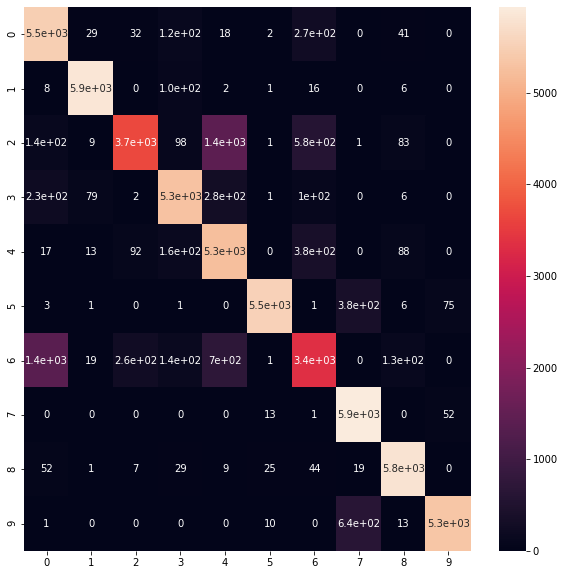

In [71]:
# stack predictions with targets
stacked = torch.stack(
    (
    train_set.targets,
    train_preds.argmax(dim=1)
    ), dim=1
)

# create confusion matrix with zeros using torch.zeros
cmt = torch.zeros(10,10, dtype=torch.int32)

for predicted in stacked:
    true_label, predicted_label = predicted.tolist()
    #cmt[true_label,predicted_label] = cmt[true_label,predicted_label] + 1
    cmt[true_label,predicted_label] += 1

# sklearn method
from sklearn.metrics import confusion_matrix

cmt2 = confusion_matrix(train_set.targets, train_preds.argmax(dim=1))

print(cmt)
#--------------------------------------------------------------------------
# Ploting the confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(cmt,annot=True)

# Questions and todo?
- How does the optimizer work?
- Spell check everything

# Resources
https://deeplizard.com/learn/video/cin4YcGBh3Q